# **Diabetic Patient Readmission -- EDA**

This dataset was analyzed by numerous Virginia Commonwealth University faculty in a recent research article which is accompanied by feature descriptions. These can be found at https://www.hindawi.com/journals/bmri/2014/781670/tab1/.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


df1 = pd.read_csv('clean_data.csv')
df2 = pd.read_excel('CMS32_DESC_LONG_SHORT_DX.xlsx') #ICD9 diagnoses codes with descriptions

In [4]:
df1.keys()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
df1.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80)
weight,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,7,2,2,7
time_in_hospital,1,3,2,2,1,3,4,5


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


**More cleaning:**<br><br>
UCI Machine Learning Repository Link: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008<br><br>
Dataset information provided on the UCI website:<br><br>
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.<br><br>
(1) It is an inpatient encounter (a hospital admission).<br>
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.<br>
(3) The length of stay was at least 1 day and at most 14 days.<br>
(4) Laboratory tests were performed during the encounter.<br>
(5) Medications were administered during the encounter.<br><br>
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [20]:
df2.sample(10)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION
99,01085,"Other primary progressive tuberculosis, tuberc...",Prim prg TB NEC-histo dx
13303,E9654,Assault by other and unspecified firearm,Assault-firearm NEC
9350,78724,"Dysphagia, pharyngoesophageal phase","Dysphagia,pharyngoesoph"
9496,79430,"Abnormal cardiovascular function study, unspec...",Abn cardiovasc study NOS
8981,76389,Other specified complications of labor and del...,Compl del NEC aff NB
12338,E8112,Motor vehicle traffic accident involving re-en...,Reentrant coll-motcycl
10997,90255,Injury to uterine artery,Injury uterine artery
13609,V114,Personal history of combat and operational str...,Hx combat/stress reactn
12874,E8850,Fall from (nonmotorized) scooter,Fall-nonmotor scooter
11053,9072,Late effect of spinal cord injury,Late eff spinal cord inj


In [3]:
print('diag_1:', df2['DIAGNOSIS CODE'].isin(df1.diag_1).sum(), 'matches out of', df1.diag_1.nunique())
print('diag_2:', df2['DIAGNOSIS CODE'].isin(df1.diag_2).sum(), 'matches out of', df1.diag_2.nunique())
print('diag_3:', df2['DIAGNOSIS CODE'].isin(df1.diag_3).sum(), 'matches out of', df1.diag_3.nunique())

diag_1: 48 matches out of 717
diag_2: 55 matches out of 749
diag_3: 57 matches out of 790


The dataset was extracted under the stipulation that the patient has *some record* of a diabetic condition recorded in the Electronic Health Records (EHR).

In [7]:
df1_numeric = df1[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
df1_numeric.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1
num_lab_procedures,41,59,11,44,51,31,70,73,68,33,47,62,60,55,49
num_procedures,0,0,5,1,0,6,1,0,2,3,2,0,0,1,5
num_medications,1,18,13,16,8,16,21,12,28,18,17,11,15,31,2
number_outpatient,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
number_emergency,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
number_inpatient,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
number_diagnoses,1,9,6,7,5,9,7,8,8,8,9,7,8,8,8


In [8]:
df1[df1.A1Cresult != 'None'].readmitted.value_counts()

NO     9542
>30    5800
<30    1676
Name: readmitted, dtype: int64

In [22]:
df1[df1.A1Cresult == 'None'].readmitted.value_counts()

NO     45322
>30    29745
<30     9681
Name: readmitted, dtype: int64

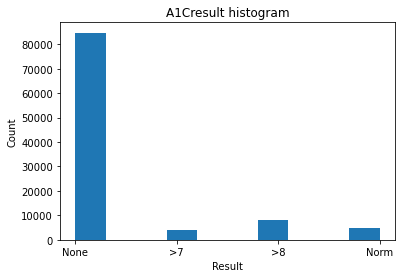

In [10]:
plt.hist(df1.A1Cresult)
plt.title('A1Cresult histogram')
plt.xlabel('Result')
plt.ylabel('Count');

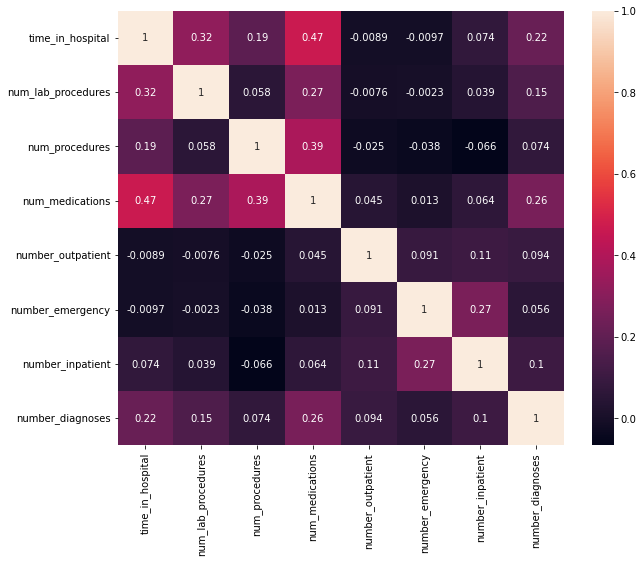

In [11]:
df1_numeric_corr = df1_numeric.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(df1_numeric_corr, annot=True);

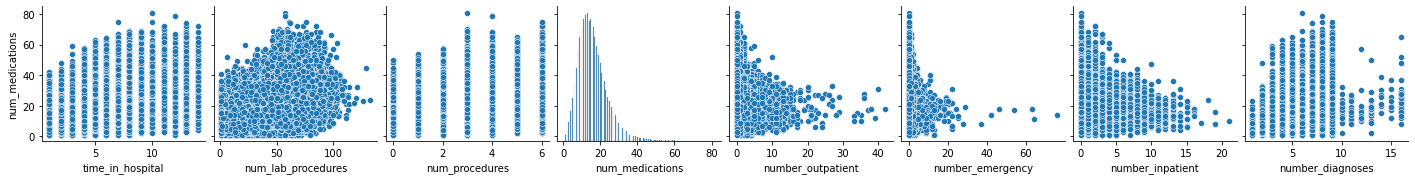

In [12]:
sns.pairplot(df1_numeric, y_vars=['num_medications']);

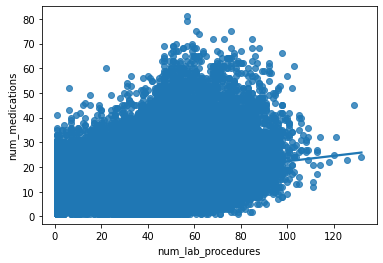

In [13]:
sns.regplot(x='num_lab_procedures',y='num_medications',data=df1_numeric);

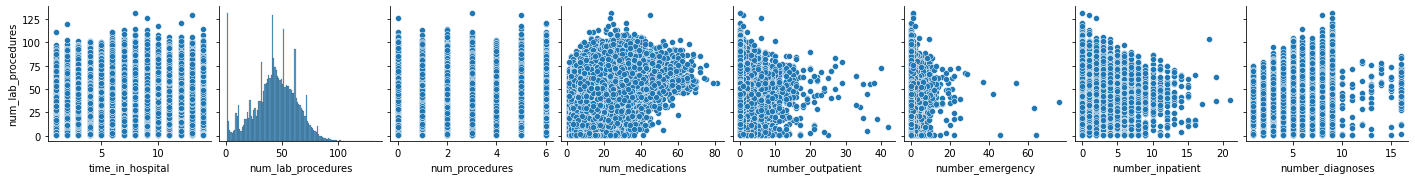

In [14]:
sns.pairplot(df1_numeric, y_vars=['num_lab_procedures']);

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64


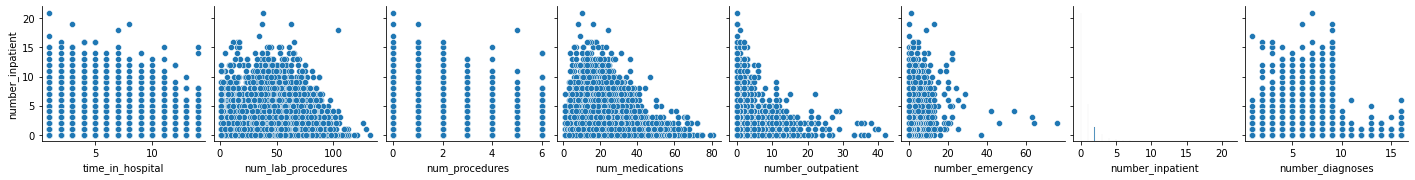

In [15]:
print(df1_numeric.number_inpatient.value_counts()) # No. of recorded inpatient visits in the year prior to the recorded encounter
sns.pairplot(df1_numeric, y_vars=['number_inpatient']);

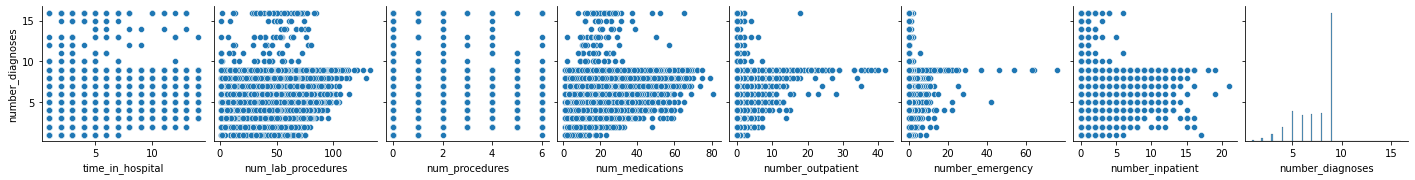

In [16]:
sns.pairplot(df1_numeric, y_vars=['number_diagnoses']);